# Goal of the project
The goal of this project is to learn a policy for an inverted pendulum model to make it do a swing-up motion. Beyond the task of inverting a pendulum, the goal is to also gain an understanding on how Q-learning works, its limitations and advantages.

To make the problem interesting, the inverted pendulum has a limit on the maximum torque it can apply, therefore it is necessary for the pendulum to do a few "back and forth" motions to be able to reach the inverted position ($\theta=\pi$) from the standing still non-inverted position ($\theta=0$). 

<img src='pendulum.png' width="120">

In the following, we will write $x = \begin{pmatrix} \theta \\ \omega \end{pmatrix}$ as the vector of states of the system. We will also work with time-discretized dynamics, and refer to $x_n$ as the state at time $t = n \Delta t$ (assuming discretization time $\Delta t$)

We want to minimize the following discounted cost function
$$\sum_{i=0}^{\infty} \alpha^i g(x_i, u_i)$$ where 
$$g(x_i, u_i) = (\theta-\pi)^2 + 0.01 \cdot \dot{\theta}_i^2 + 0.0001 \cdot u_i^2 \qquad \textrm{and} \qquad\alpha=0.99$$
This cost mostly penalizes deviations from the inverted position but also encourages small velocities and control.

## Q-learning with a table
In the first part, we will implement the Q-learning algorithm with a table. To that end, we are given a robot (defined in the package ```pendulum.py```) with a function ```get_next_state(x,u)``` that returns $x_{n+1}$ given $(x_n, u_n)$. We will assume that $u$ can take only three possible values. Note that $\theta$ can take any value in $[0,2\pi)$ and that $\omega$ can take any value between $[-6,6]$. 

In order to build the table, we will need to discretize the states. So for the learning algorithm we will use 50 discretized states for $\theta$ and 50 for $\omega$. Keep in mind that the real states of the pendulum used to generate an episode will not be discretized.


1. Write a function ```get_cost(x,u)``` that returns the current cost $g(x,u)$ as a function of the current state and control.

2. What is the dimension of the Q-table that you will need to implement (as a numpy array)? Why?

3. How can you compute the optimal policy from the Q-table? And the optimal value function? Write a function ```get_policy_and_value_function(q_table)``` that computes both given a Q-table as an input.

4. Write a function ```q_learning(q_table)``` that implements the tabular Q-learning algorithm (use episodes of 100 timesteps and an epsilon greedy policy with $\epsilon=0.1$). The function should get as an input an initial Q-table  and return a learned Q-table of similar size. Use the function ```get_next_state``` from the pendulum package to generate the episode (do not discretize the real state of the pendulum!). During learning store the cost per episode to track learning progress.

5. How many epsilodes (approximately) does it take for Q-learning to learn how to invert the pendulum when $u \in \{-4,0,4\}$? (use a learning rate of 0.1). Show the learning progress in a plot.

6. Using the simulate / animate functions (cf. below) how many back and forth of the pendulum are necessary to go from $x = [0,0]$ to the fully inverted position? Plot the time evolution of $\theta$ and $\omega$. 

7. Plot the found policy and value function as 2D images (cf. below).

8. Answer questions 5 to 7 when using $u \in \{-5,0,5\}$. What quantitative differences do you see between the computed policies in 5. and 8.? Can you explain?

9. How is learning affected when changing $\epsilon$ and the learning rate? Why?

In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import pendulum

In [14]:
# we can get the integration step used in the simulation
print(f'dt is {pendulum.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {pendulum.NUMBER_STATES} and number of controls {pendulum.NUMBER_CONTROLS}')
print('the states are indexed as follows: theta, omega')

# we can get the maximum velocity of the pendulum (omega)
print(f'the max velocity is {pendulum.MAX_VELOCITY} rad/seconds')

dt is 0.1
number of states 2 and number of controls 1
the states are indexed as follows: theta, omega
the max velocity is 6.0 rad/seconds


In [15]:
# the next_state function allows to compute the next state given a current state and action
# This is going to be very helpful to run an episode!

# assume we set x = [theta, omega] = [0,0] and u = 5, we can get the next state using
x = np.array([0.,0.])
u = 5
x_next = pendulum.get_next_state(x, u)

print(f'the next state is {x_next}')

the next state is [0.02227801 0.48969119]


In [16]:
# we can also simulate the robot but we need to provide a controller of the following form
def dummy_controller(x):
    """
        the prototype of a controller is as follows
        x is a column vector containing the state of the robot
        
        this controller needs to return a scalar
        you may want to modify this controller to use the policy table to compute control output
    """
    # here we do nothing and just return a 0 control
    return 0.


# we can now simulate for a given number of time steps - here we do 10 seconds
T = 10.
x0 = np.array([1.4,0.])
t, x, u = pendulum.simulate(x0, dummy_controller, T)

<IPython.core.display.Javascript object>


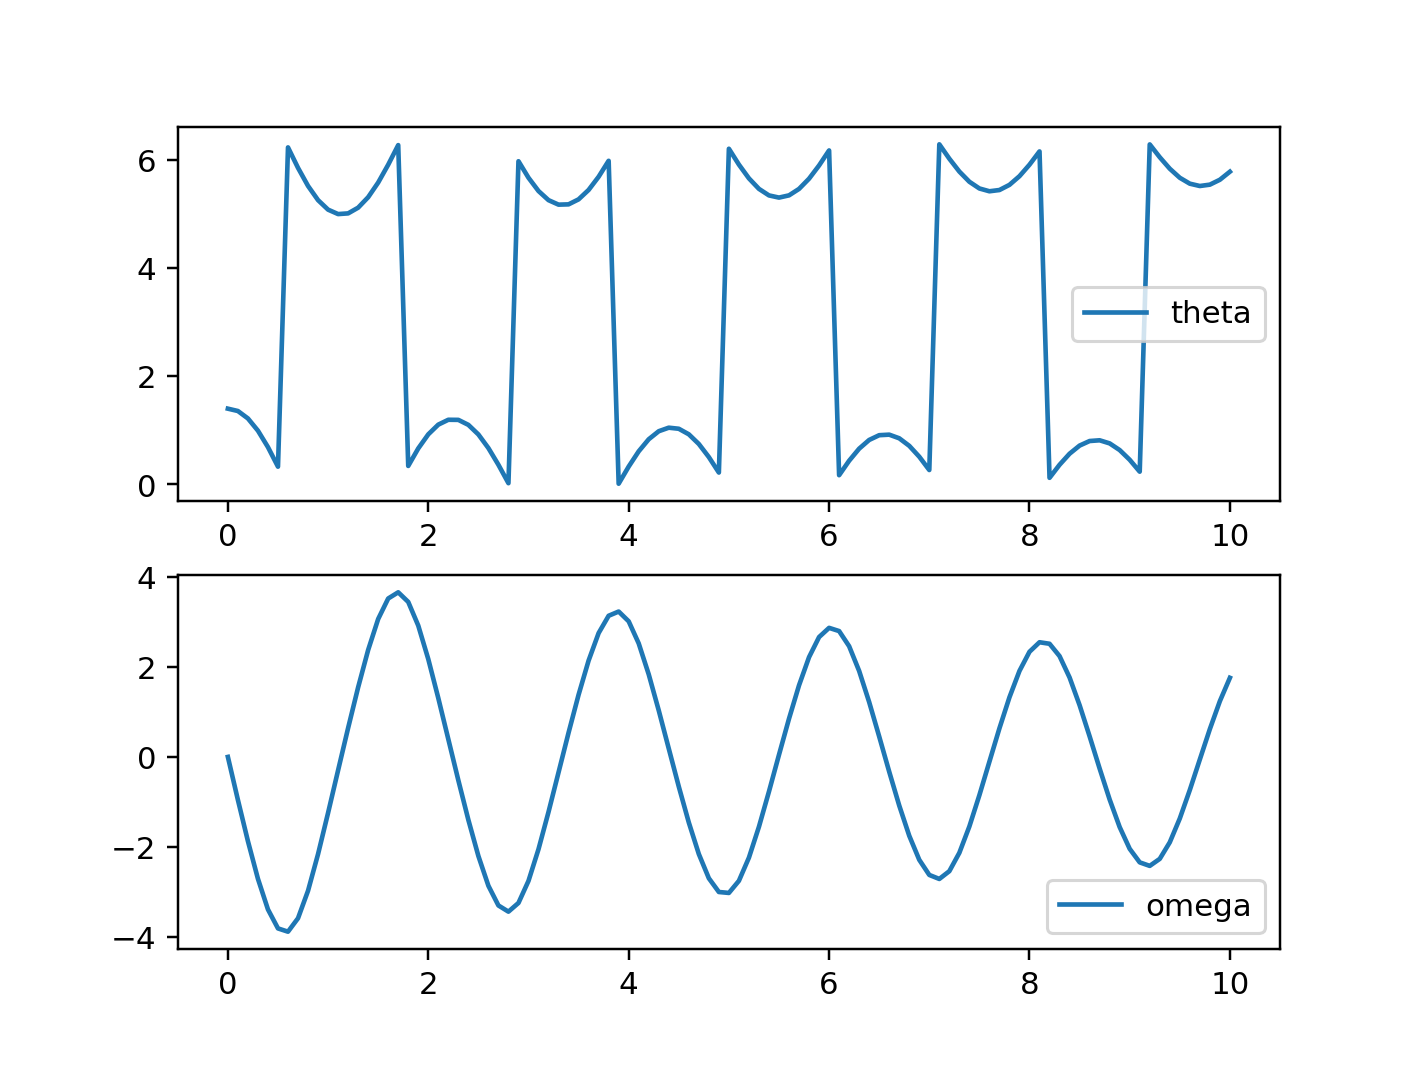

<IPython.core.display.Javascript object>


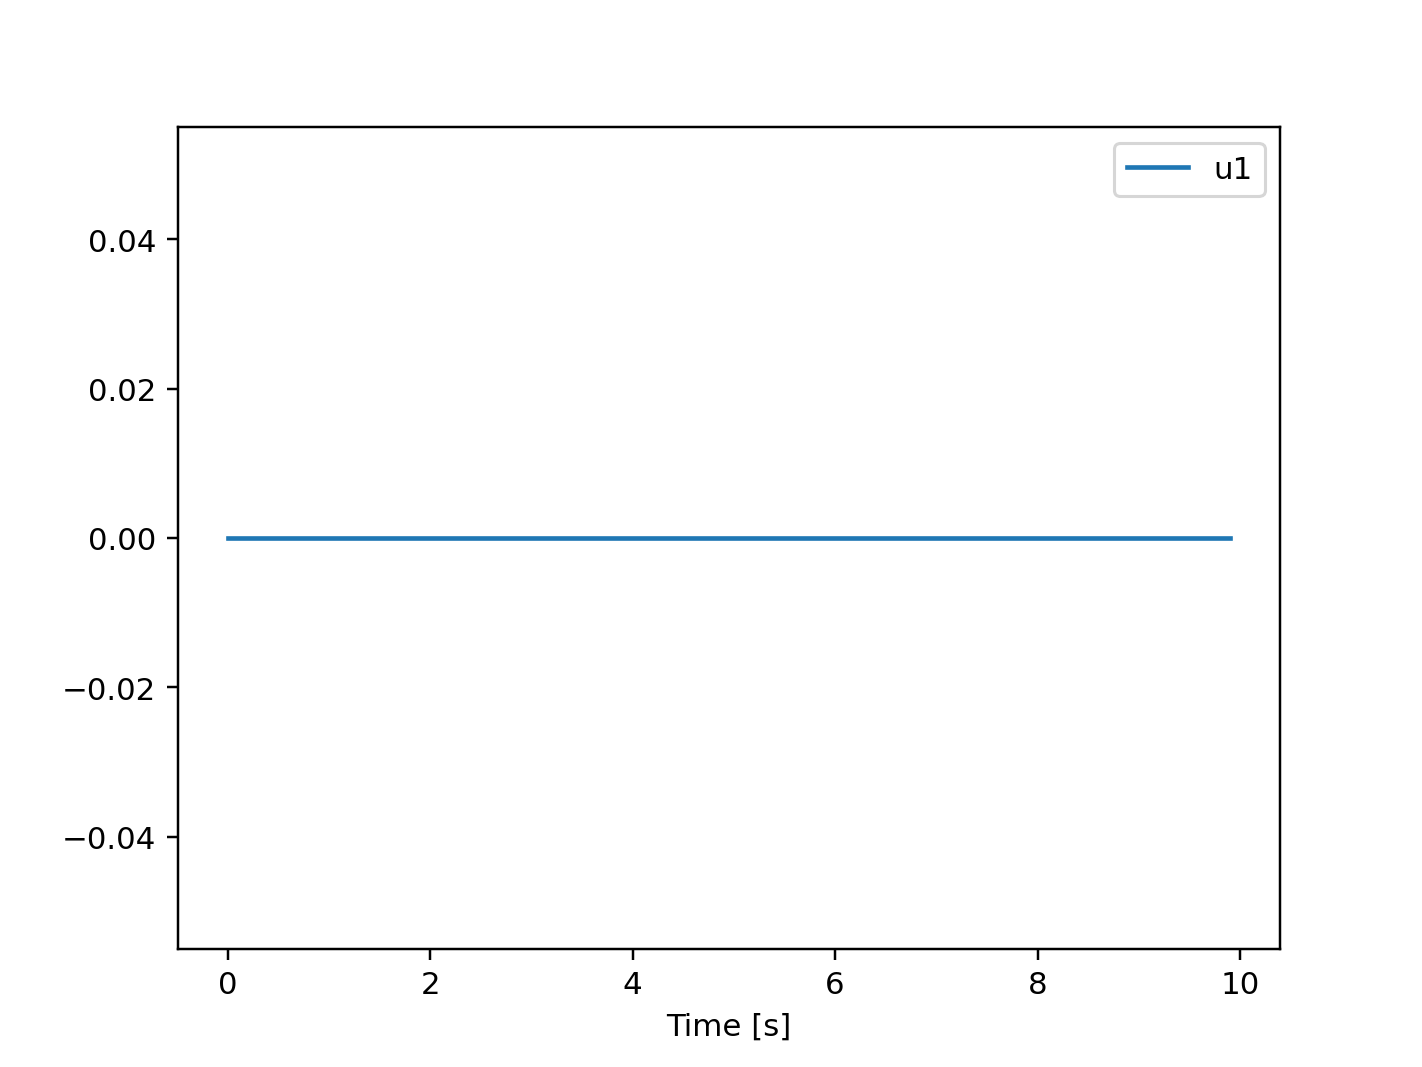

Text(0.5, 0, 'Time [s]')

In [17]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')

In [18]:
# now we can also create an animation
pendulum.animate_robot(x)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAA2EptZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE5
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Dp1liIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCLH/2+kONwAT9lg/NYjL/FoB9aiK4jE+YrYPvM3VJY4vjNnyLGP2YlbJp/NpA8k+C6YwpDlXn2f
y1TN9QNLS2doYg16nA3KBIICjrY2PQjGG/lJWgkVRima9js6Vx5WimbQrt72ItjNL7sLxElEA17m
hCeWbA7zyXROB8c1qwBwG6mF4Z9p4RctmYdY75fZ9PIcL6+1DtNo159DsIedHWW5BeeoUeMIr15+
LI/6q7q3wu/lDZN9tIlTOzRJ5hxurCa6TP3YdJ0Pua9/TkOnB1BZtIQdZE2NNeG6ZBWKX2qe8rir
o4hVHk6AK1m3pSBFYkubBzjVbb5azjAs67d441UqfxQIdZAC3wXGhd0Df4sjAsAiUQ3i9flvYL7N
AfNDl++9aqNS+m/EntCRwqCe8BI4h+X6tXM0ZlI2ui7fnCbPrzprCur/Qlv/AcWwh2PCPV27J9Hh
B4sbRpm2Il9JEsGqAKrFjtq/wKfkNJeUUJRqCO8O4BNTkM1gkUt/4YYDveK6vKxrr1xGInxBFkRx
Ra/U1q66FY5rPKRGvy/lhCV0gLPWM/Uwd4ACy0QsnRfL+3ezliZm8228ZiCQM/Bb7Hih+NU4fPzV
mXyFXbybWT3q7qlyOdubg07ODGm3wBRMgDV2F09QRWcgoRac1e6IX088F59nygAudtZ5wAAASwwU
cqaZXL0UXzviZELNw197oAtAbVd689mZlrxJVD2nKaUzy2QETgxH+VjLUGW4nahqUgWQqDMfnRA9
lcxOpvul0EAwcmU/0ADaLvjFil9t7FUYKNxT6HPKJl9bOWLYqE+Cy39/mB8mN+2C9yTgeLkAYVNj
W62F82r/AqVC2BbuZp4VB+J9deuuOciIUAihH1mqc5GMh8KZmyduCGi7jBcE8GKK7Ktho1WaT7h0
oHuZDvhA+oN7r4xx/LU72e6n74sxOP/4YHwYrCx4uunVofIvqDyI8tU9VfBCymj6+aeibavntZjy
E6vpfbntb9PpYz8yDN5s//onJnSdeCwDlC2zfnnDF5/i64VFsUozdyzoOAFZ/mOly8BMmunCX7cf
EaLO2X0NCr8YbfayRSRH+EkL4LZQNFsTQW+f5YpLWIWTKN5ycjfBh9gmyvhJ3gAAAwA/w9y2g0Ig
gS8th3BWp7voJwMtuJrvDkXS9i71tR4u+i0i2lOu5yABFFWcgxQOZVoCEOsmN7utMaIYt8XdExP+
Otlja/PPFgV5C6hYeCTosAnoXscAbvHoeJu8OMc3T6WJrbJcW8UIqq/IKiE33XpOg2mi2mu5d1Dl
7LynqkDrtrnJ+/NBF3dKG0Ev1as7X9nTmth/Vc4U35wH5HRlJyHC/CYuxGGP718bDddiIacj0e5A
h47bQkv7qFL9uniT61NDDklJm++/ws/BZIFeiAd4wF43ECg5pmi92P0vthqElCVXaYTWq2rpCav3
/WVw3wBoPaDlQUVwUVgb1Ig09zwAFIpgYF/oV+JosGsrRBSRbigNf+QLcPvEPqGCbp6ExgwQ86Vi
1WLN8HMSBSgad3NZNzu7wG8xgKOdgTDNLLodCsvQ0kgBJ3e4K41mjzPVU4K9iSxpywWv6k/r8o9d
VuVbZkBL0R+z3in5dvzsN5lHNpOgupgA/yMxvhdvTOD1SU1KuHjfeqNgF/g+k8QBSzguFGIBopmh
MVz0uatCH3afWDr8bXx+eWNVN3lLTyXq1OPiXIeelZDhjGWno3xG5SGGQv+XA/VjnPqMuwzNYaba
FRwoU6OB7JkSwbld6dzh022Bu+4/0WSV9ZBE0EfoGaRvmZ6VYQutyJUnL3dspza3yGqy1xWNOg2t
ii2/hUrX1Z/6TWbrIyHge8zE5+f8V9l5H574Ktyb6GpBn8OmrHpuKAVpP6Kwh95A1kkA6+jVzAjB
alaLUeVRL/wLnt1+15pBjMa6KrJ/YtHdomVi29vBUcxVT2glNwTvodd42ZmGa4XNlP/ey7R36SQB
E5a91zhOaFmTOda9jowgSeH2+PwdsnJEM9/HActZCtM/Voa2pctff2X1/swoCedVOjJrcqL5fwNa
WHd/MADiEvQcebiMHy3mZBUMmMbbCvj79lU0veV2JrC/E2twTSSrhTUDJXNWTvt0k5re54ghWQwq
jE6t7Tfv11qGnyRizXQ1We7TEKkeBTU8PW691XdckB9e6j4zgtNJ7sKRuB1n/f0xTQUCIaZgDK2R
HgyOaRkFPWssOoz3NZW0xgKk92DqaSkgXU7iuMBqMd89gsZ6S6Y7asBL5F6KN3X4iIUEX4Gur5SZ
4yqsMS3yBVwLD8X0psVwxK1Pw6Oc/M++6JRsZtBpEHFrvajwDykiH/jMxdCyOu7iKe6ZM8Q+WDu7
j1mrYf9v49Ei54glVqX9XxOj2kXTdRJlTkabm4FRUm5M4luXJ38jL7f2b21TSBY/ofc9HElI3SKi
kDb39s0DnRvlEXnANP9G2sxn2IOz5rCduKpmV9Mw4Jtlw8GDmPCQXz73fStct6hDbkJPzLnruw7q
VDoDFOg7QHQM2Z86fZa5ni1irgRkBDgzJiJ8QPPAKetPbtlR5nKKI4rJZ8no3Obf5EvFrnP/5xnB
zOt0555gBbKXZzL08LNkgE1iR/Yfw8l147rt4XZVstbG1p2zxEEiEyuwFMa+VO1GBfd337kce6Hh
JBMQyDxiTTAJtzfYYrul2p2jnV/Je3hOQBpUtX59CTytHpZo9TtWheBqxJ5zcrDOPdv/Zd14ej+/
AHX2TCaoDtv9E4chrygYvKNzqEUa4dzg8eE+XbpRMuBz7FPGrywE+VXljyQSzp4N4JW3n7WhBPc8
VhWQ7RGtMTbu3IdgAWLIC

We also need to discretize the state space, we discretize $\theta \in [0, 2\pi]$ in 50 states and $\dot{\theta} \in [-6, 6]$ is 50 states. For example:

In [19]:
# we don't want 2pi to be in the set because it's the same as 0
# we generate 50 equally spaced points for theta
discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)

# we generate 50 equally spaced points for omega
discretized_omega = np.linspace(-6, 6, 50)

# now given an arbitrary continuous state theta
theta_arbitrary = 0.6234
omega_arbitrary = 1.234

# we can find the index of the closest element in the set of discretized states
index_in_discretized_theta = np.argmin(np.abs(np.sin(discretized_theta - theta_arbitrary)))
index_in_discretized_omega = np.argmin(np.abs(discretized_omega - omega_arbitrary))

# and find the closed discretized state
closest_theta_state = discretized_theta[index_in_discretized_theta]
closest_omega_state = discretized_omega[index_in_discretized_omega]

print(f'the discretized theta closest to {theta_arbitrary} is {closest_theta_state} with index {index_in_discretized_theta}')
print(f'the discretized omega closest to {omega_arbitrary} is {closest_omega_state} with index {index_in_discretized_omega}')

the discretized theta closest to 0.6234 is 0.6283185307179586 with index 5
the discretized omega closest to 1.234 is 1.3469387755102042 with index 30


<IPython.core.display.Javascript object>


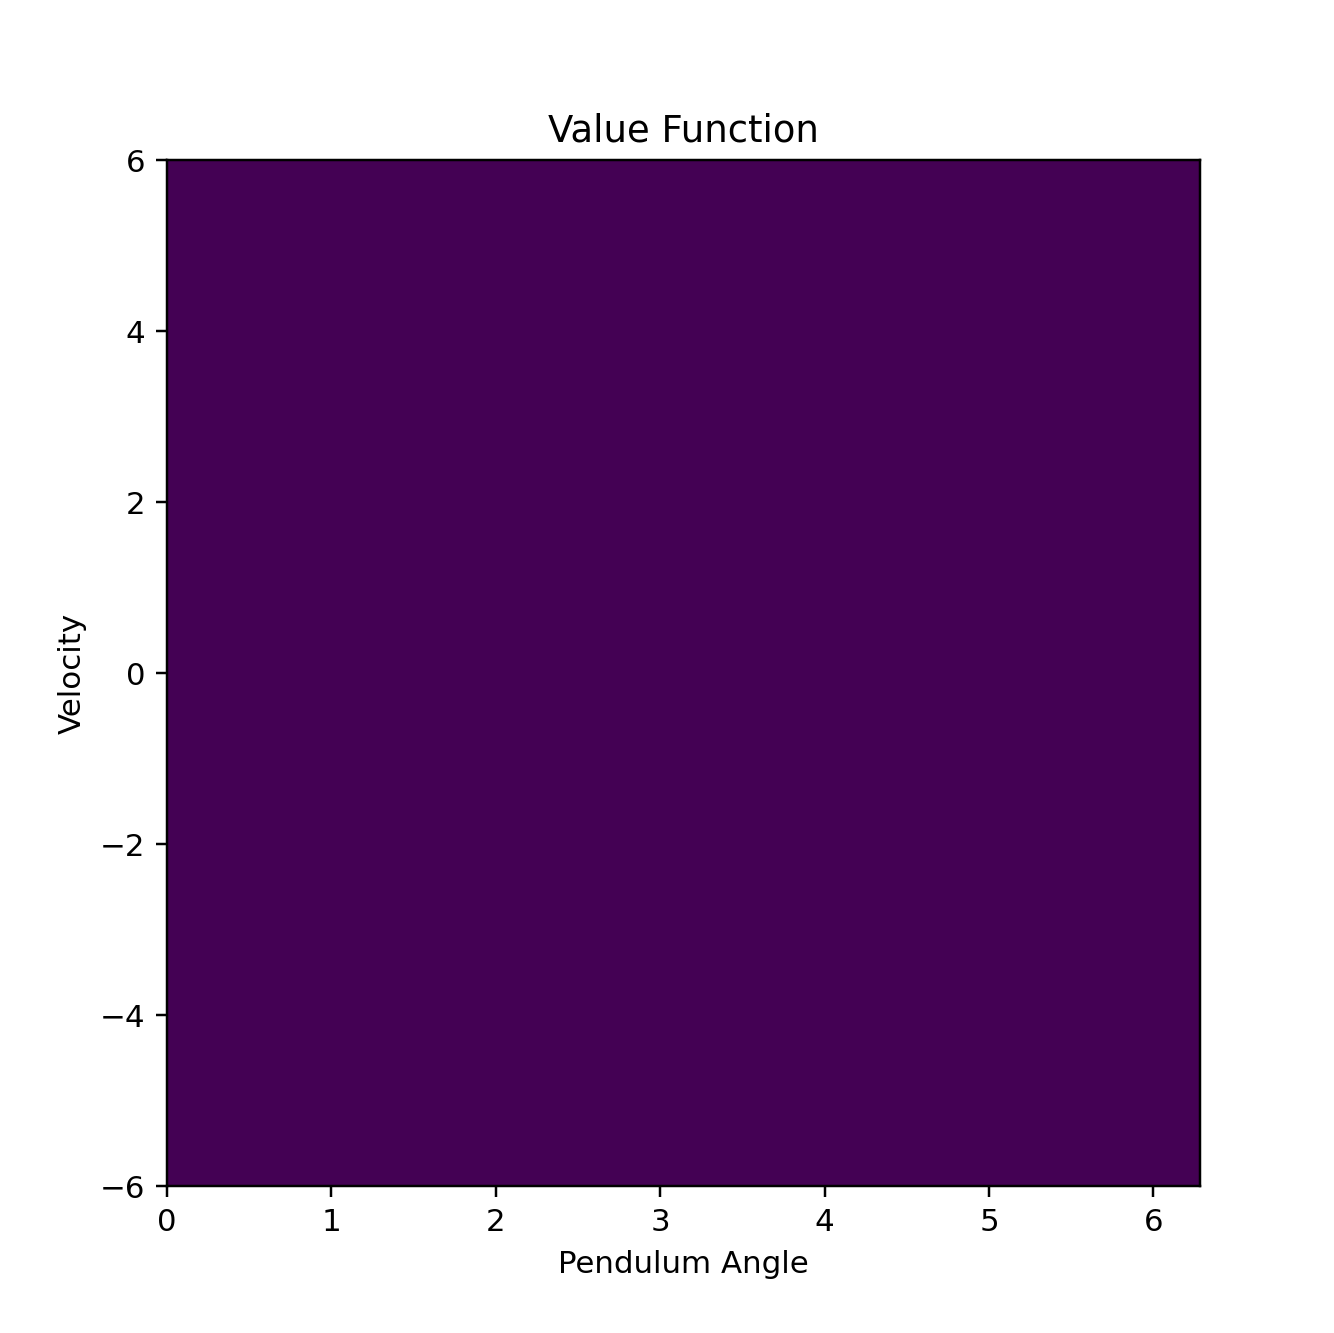

<IPython.core.display.Javascript object>


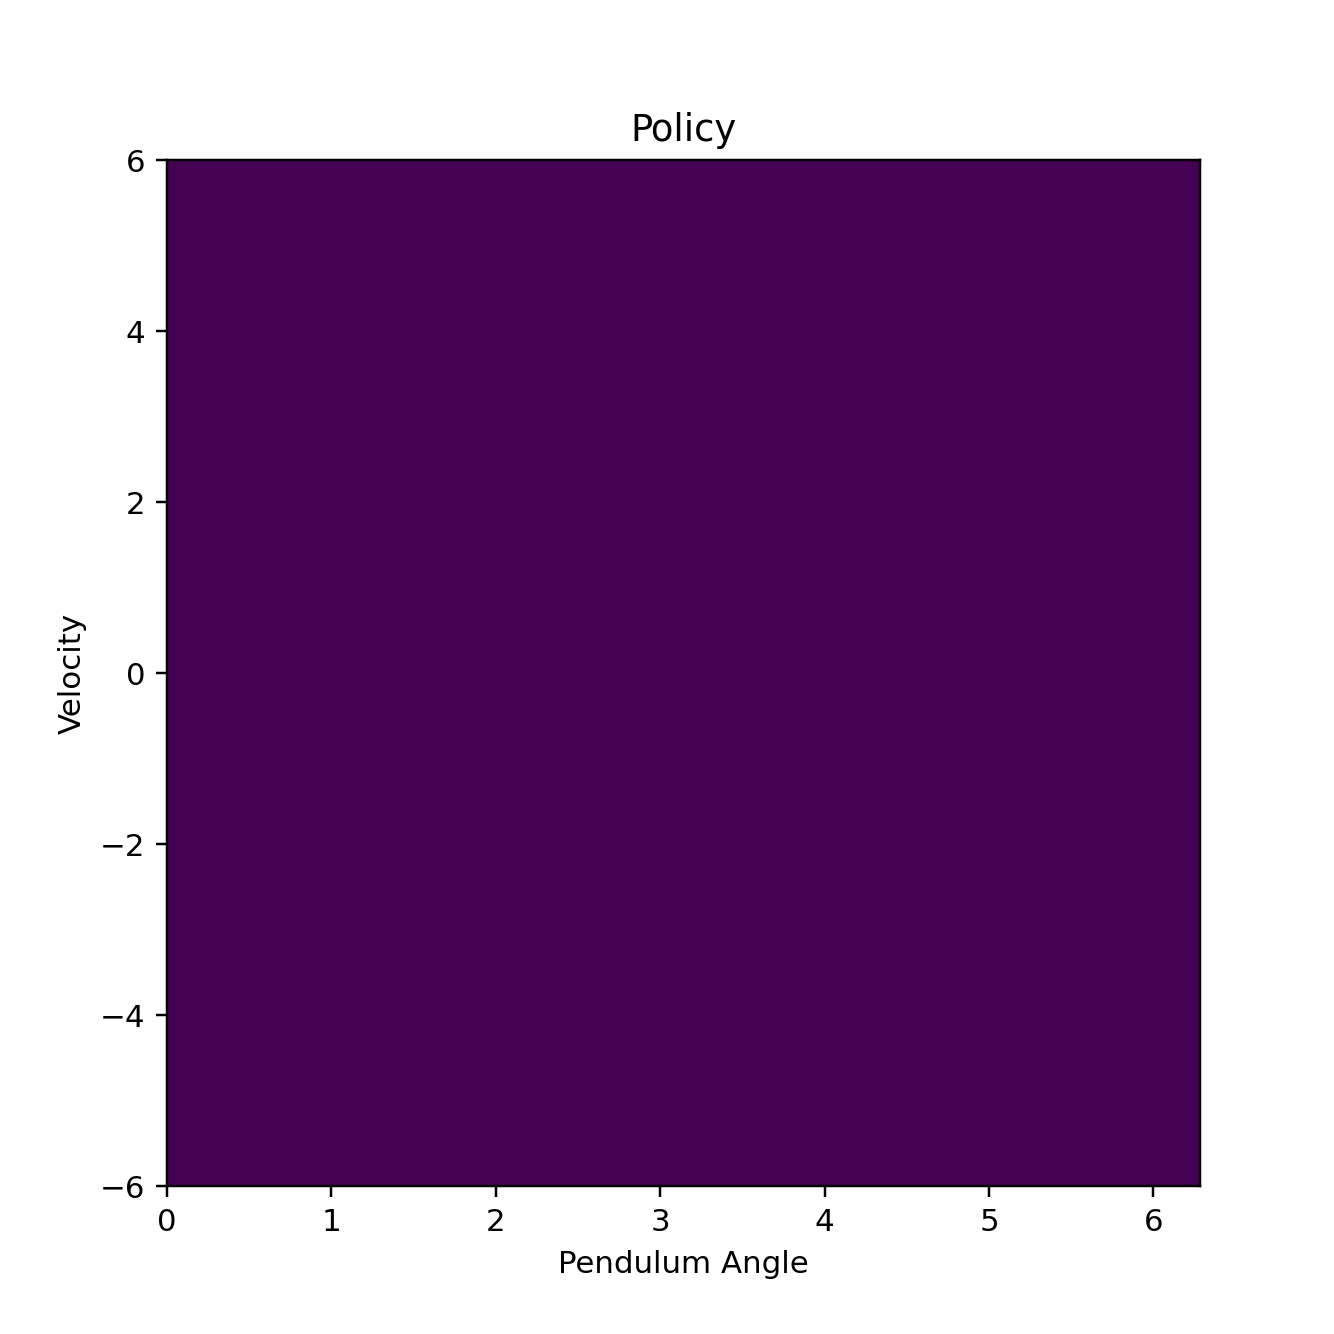

Text(0.5, 1.0, 'Policy')

In [20]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2

value_function = np.zeros([50,50])
policy = np.zeros([50,50])

# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')